In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

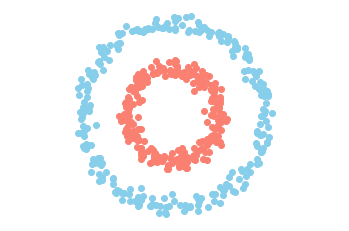

In [2]:
#Let's create a data set:

n = 500
p = 2
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis('off')
plt.axis('equal')
plt.show()

In [3]:
# Class for creating the layer of the NN
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 -1
        self.w = np.random.rand(n_conn, n_neur) * 2 -1
        

In [4]:
#Activations functions:

sigm = (lambda x: 1 / (1 + np.e **(-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0, x),
       lambda x: 0 if x<0 else 1)


In [5]:
def create_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    return nn

In [6]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train (neural_net, X, Y, l2_cost, lr = 0.05, train = True):
    out = [(None, X)]
    #Forwrd Pass
    for l, layer in enumerate(neural_net):
        
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
        
    if train:
        
        #Backward pass
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _w.T *neural_net[l].act_f[1](a))
                
            _w = neural_net[l].w
                
        #Gradient descent 
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
    return(out[-1][1])

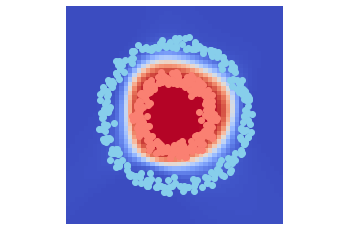

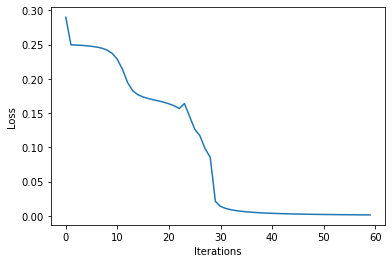

[0.93323405]
[1]


[0.88155285]
[1]


[0.0148764]
[0]


[0.02744641]
[0]


[0.00913703]
[0]


[0.02478132]
[0]


[0.98021853]
[1]


[0.92979851]
[1]


[0.94675279]
[1]


[0.07131089]
[0]


[0.9887731]
[1]


[0.99653318]
[1]


[0.97123485]
[1]


[0.97667427]
[1]


[0.002727]
[0]


[0.97939155]
[1]


[0.95986686]
[1]


[0.0230429]
[0]


[0.98866322]
[1]


[0.94501653]
[1]


[0.97858301]
[1]


[0.01903896]
[0]


[0.98476658]
[1]


[0.03120611]
[0]


[0.96786313]
[1]


[0.06689605]
[0]


[0.03770701]
[0]


[0.02160178]
[0]


[0.97765954]
[1]


[0.98898661]
[1]


[0.95220732]
[1]


[0.98518365]
[1]


[0.99323079]
[1]


[0.05135386]
[0]


[0.99082306]
[1]


[0.01310333]
[0]


[0.05862626]
[0]


[0.99636835]
[1]


[0.98115923]
[1]


[0.05897987]
[0]


[0.98900586]
[1]


[0.04035399]
[0]


[0.00246416]
[0]


[0.05303292]
[0]


[0.9543866]
[1]


[0.0528844]
[0]


[0.01789274]
[0]


[0.01379901]
[0]


[0.02062277]
[0]


[0.04197137]
[0]


[0.99139518]
[1]


[0.9819423]
[1]


[0.02427135]
[0]


[

In [8]:
import time
from IPython.display import clear_output 

neural_n = create_nn(topology, sigm)
loss = []

for i in range(1500):
    #Let's train the network:
    pY = train(neural_n, X, Y, l2_cost, lr = 0.035)
    if i % 25 == 0:
        print(pY)
        loss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
        
        clear_output(wait = True)
        plt.axis('off')
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        time.sleep(0.5)
for l, pY in enumerate(pY):
    print(pY)
    print(Y[l])
    print("\n")
